In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Model,Input
import os

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow version: 2.15.0


## Preprocessing and Loading Dataset

In [4]:
imgpath_load = np.load('/Users/anmolchalise/Desktop/affectnet/train_set/sampled_annotations/train_imgpath_smp.npz', allow_pickle=True)
paths=imgpath_load['path']
paths

array(['train_set/images/263039.jpg', 'train_set/images/130891.jpg',
       'train_set/images/274783.jpg', ..., 'train_set/images/152649.jpg',
       'train_set/images/134538.jpg', 'train_set/images/164554.jpg'],
      dtype=object)

In [5]:
train_dir = '/Users/anmolchalise/Desktop/affectnet'
train_paths = [os.path.join(train_dir, file) for file in paths]


In [6]:
train_paths

['/Users/anmolchalise/Desktop/affectnet/train_set/images/263039.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/130891.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/274783.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/115650.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/115061.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/26994.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/174822.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/238740.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/158736.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/253746.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/105539.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/145909.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/135519.jpg',
 '/Users/anmolchalise/Desktop/affectnet/train_set/images/14732.jpg',
 '/Users/anmolchalise/

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
def load_and_preprocess_image(image_path):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  
    
    return image
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

batch_size = 32
train_features = train_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)



In [8]:

train_exp = np.load('/Users/anmolchalise/Desktop/affectnet/train_set/sampled_annotations/train_exp_smp.npz',allow_pickle=True)

print(train_exp['exp'].shape)


(85839,)


In [9]:
train_exp['exp']

array(['2', '1', '3', ..., '1', '1', '0'], dtype=object)

In [10]:
train_labels=tf.data.Dataset.from_tensor_slices(train_exp['exp'].astype(int))

In [11]:
batch_size = 32
train_labels= train_labels.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [12]:
train_ds=tf.data.Dataset.zip((train_features,train_labels))


In [13]:
class_names = {
    0:'neutral',
    1:'happiness',
    2:'sadness',
    3:'surprise',
    4:'fear',
    5:'disgust',
    6: 'anger',
    7:'contempt',
   }

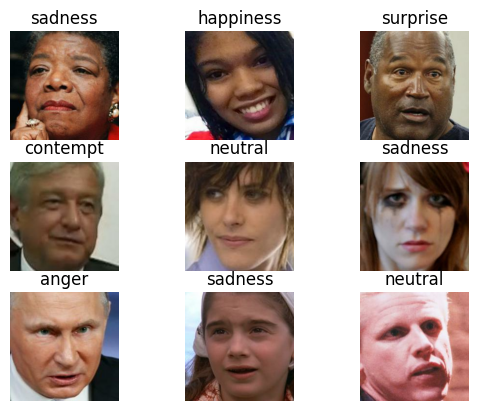

In [14]:
import matplotlib.pyplot as plt

image,labels=train_ds.as_numpy_iterator().next()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].astype('uint8'))
    plt.title(class_names[labels[i]])
    
    plt.axis('off')

In [15]:
label_counts = {i: 0 for i in range(8)} 
for _,label_batch in train_ds:
    labels=label_batch.numpy()
    for label in labels:
        label_counts[label] += 1


In [16]:
for key,value in label_counts.items():
    print(f'{class_names[key]} : {value}')

neutral : 15037
happiness : 19445
sadness : 12676
surprise : 14090
fear : 6378
disgust : 3803
anger : 10660
contempt : 3750


In [17]:
import tensorflow as tf
import numpy as np
import os


val_dir = '/Users/anmolchalise/Desktop/affectnet/val_set/images'
val_paths = sorted([os.path.join(val_dir, file) for file in os.listdir(val_dir) if file.endswith('.jpg')])
val_dataset = tf.data.Dataset.from_tensor_slices(val_paths)


def load_and_preprocess_image(image_path):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  
    
    return image

val_dataset = val_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

batch_size = 32
test_features = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)






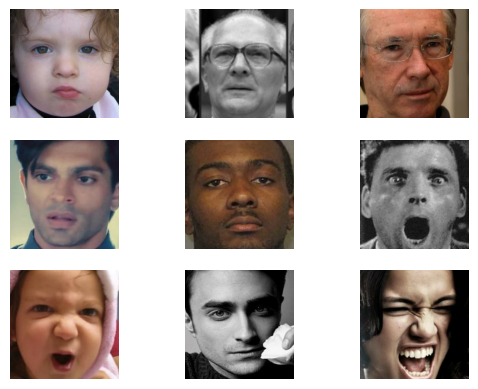

In [18]:
import matplotlib.pyplot as plt

image=test_features.as_numpy_iterator().next()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].astype('uint8'))
    plt.axis('off')

In [19]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import models,layers,datasets

In [20]:


test_exp = np.load('/Users/anmolchalise/Desktop/affectnet/val_set/annotations/val_exp.npz')
print(test_exp['exp'].shape)


(3999,)


In [21]:
test_exp['exp'].astype('int')

array([0, 0, 7, ..., 1, 6, 3])

In [22]:

test_labels=tf.data.Dataset.from_tensor_slices(test_exp['exp'].astype(int))

In [23]:
batch_size = 32
test_labels= test_labels.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [24]:
train_label_size=tf.data.experimental.cardinality(train_labels).numpy()
test_label_size=tf.data.experimental.cardinality(test_labels).numpy()

In [25]:
print(train_label_size)
print(test_label_size)

2683
125


In [26]:
test_ds=tf.data.Dataset.zip((test_features,test_labels))


In [27]:
for image_batch,label_batch in test_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 224, 224, 3)
(32,)


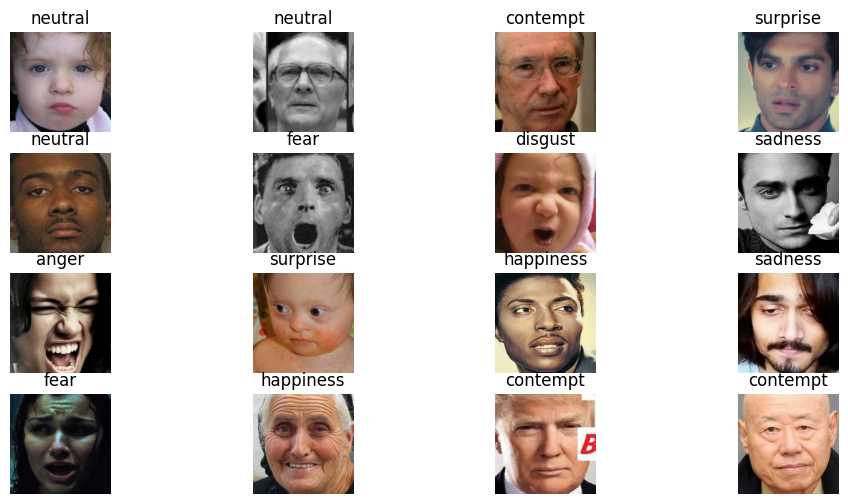

In [28]:
np.random.seed(123)
plt.figure(figsize=(12,6))
image_batch, label_batch = test_ds.as_numpy_iterator().next()

for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

## train_validation_test split

In [31]:
train_batches=tf.data.experimental.cardinality(train_ds)

In [32]:
val_ds=train_ds.take(train_batches//5)
train_ds=train_ds.skip(train_batches//5)

In [33]:
print(len(val_ds))
print(len(train_ds))

536
2147


In [34]:
label_counts = {i: 0 for i in range(8)} 
for _,label_batch in test_ds:
    labels=label_batch.numpy()
    for label in labels:
        label_counts[label] += 1



In [35]:
for key,value in label_counts.items():
    print(f'{class_names[key]} : {value}')

neutral : 500
happiness : 500
sadness : 500
surprise : 500
fear : 500
disgust : 500
anger : 500
contempt : 499


In [36]:
label_counts = {i: 0 for i in range(8)} 
for _,label_batch in train_ds:
    labels=label_batch.numpy()
    for label in labels:
        label_counts[label] += 1



In [37]:
for key,value in label_counts.items():
    print(f'{class_names[key]} : {value}')

neutral : 11972
happiness : 15619
sadness : 10128
surprise : 11258
fear : 5169
disgust : 3051
anger : 8504
contempt : 2986


In [38]:
label_counts = {i: 0 for i in range(8)} 
for _,label_batch in val_ds:
    labels=label_batch.numpy()
    for label in labels:
        label_counts[label] += 1



In [39]:
for key,value in label_counts.items():
    print(f'{class_names[key]} : {value}')

neutral : 3065
happiness : 3826
sadness : 2548
surprise : 2832
fear : 1209
disgust : 752
anger : 2156
contempt : 764


In [40]:
print(len(test_ds))
print(len(val_ds))
print(len(train_ds))


125
536
2147


## Data Augmentation

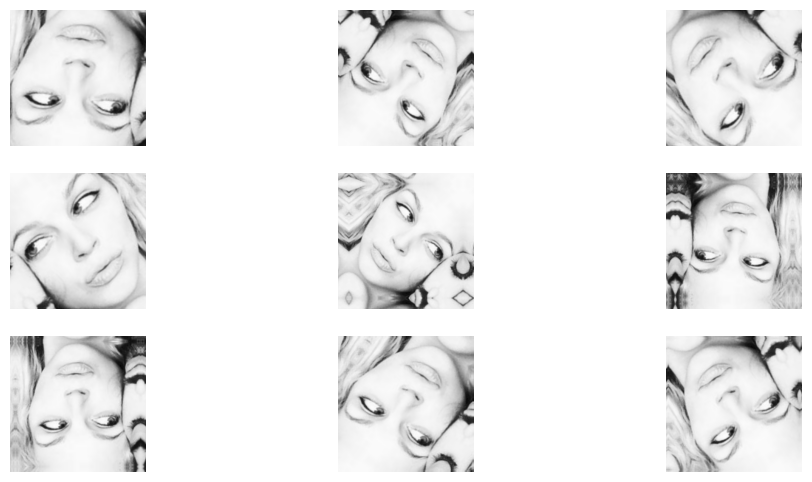

In [41]:
img_size=(224,224)
img_shape=img_size+(3,)
data_aug=tf.keras.Sequential([layers.RandomFlip('horizontal_and_vertical',input_shape=img_shape),
                              layers.RandomRotation(0.2),
                              layers.RandomZoom(0.2)])
plt.figure(figsize=(12,6))
for images,_ in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        augmented_image=data_aug(images)
        plt.imshow(augmented_image[2].numpy().astype('uint8'))
        plt.axis('off')
                              

In [46]:
weight_path='/Users/anmolchalise/Desktop/AI_ML_model/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

## Model 


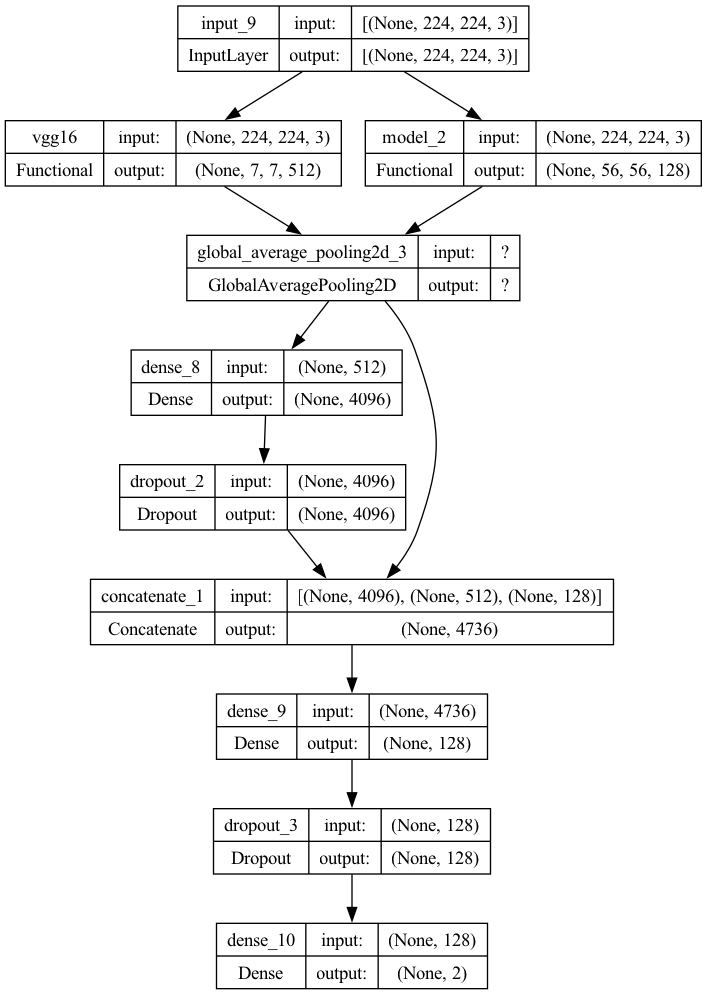

In [55]:


data_aug=tf.keras.Sequential([layers.RandomFlip('horizontal_and_vertical',input_shape=(224,224,3)),
                              layers.RandomRotation(0.2),
                              layers.RandomZoom(0.2)])

preprocess_input=tf.keras.applications.vgg16.preprocess_input


base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights=None)
base_model.load_weights(weight_path)


base_model.trainable=False
global_avg_layer=layers.GlobalAveragePooling2D()
prediction_layer=layers.Dense(128,activation='linear')






input_image=Input(shape=(224,224,3))
aug_img=data_aug(input_image)
preprocessed_img=preprocess_input(aug_img)

base_model_output=base_model(input_image,training=False)

block2_pool_output = base_model.get_layer('block2_pool').output
model_block2_pool = Model(inputs=base_model.input, outputs=block2_pool_output)
pool_2_output = model_block2_pool(input_image)
pool_2_output_global=global_avg_layer(pool_2_output )

base_model_output_global=global_avg_layer(base_model_output)

x=layers.Dense(4096,activation='relu')(base_model_output_global)
x=layers.Dropout(0.5)(x)

x=layers.concatenate([x,base_model_output_global,pool_2_output_global])


x=layers.Dense(128,activation='relu')(x)
x=layers.Dropout(0.8)(x)
outputs=layers.Dense(2,activation='relu')(x)

model=tf.keras.Model(input_image,outputs)



tf.keras.utils.plot_model(model,show_shapes=True)

In [47]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 10
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)


In [ ]:

model.save('/Users/anmolchalise/Users/anmolchalise/Desktop/AI_ML_model/affectnet_CNN_VGG.h5')
import pickle


with open('/Users/anmolchalise/Desktop/AI_ML_model/history_affectnet_CNN_VGG.pkl', 'wb') as file:
    pickle.dump(history, file)  


    

In [ ]:
base_model.trainable=True

In [ ]:
print('Total layers',len(base_model.layers))


In [ ]:
fine_tune_at=10
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable=False

In [ ]:
base_learning_rate=0.0001
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10

total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history_4.epoch[-1],
                         validation_data=validation_ds)

In [ ]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

In [ ]:
predictions = tf.nn.softmax(predictions)
predictions = tf.argmax(predictions, axis=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  predicted_label = class_names[(predictions[i])]
    
  plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
  plt.grid('off')
  plt.xticks([])
  plt.yticks([])
    

In [ ]:
image,label=test_ds.as_numpy_iterator().next()
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(image[i].astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

## Predictions


In [56]:
model_fine=tf.keras.models.load_model('/Users/anmolchalise/Desktop/AI_ML_model/mid_defense_models/affectnet_CNN_VGG2_fine.h5')
model=tf.keras.models.load_model('/Users/anmolchalise/Desktop/AI_ML_model/mid_defense_models/affectnet_CNN_VGG2.h5')


import pickle


with open('/Users/anmolchalise/Desktop/AI_ML_model/mid_defense_models/history_affectnet_CNN_VGG2_fine.pkl', 'rb') as file:
    history_fine = pickle.load(file)
    


with open('/Users/anmolchalise/Desktop/AI_ML_model/mid_defense_models/history_affectnet_CNN_VGG2.pkl', 'rb') as file:
    history = pickle.load(file)
    

## Predictions using feature extraction model

In [57]:
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions=model.predict_on_batch(image_batch)
predctions=tf.nn.softmax(predictions)
predictions=predictions.numpy()

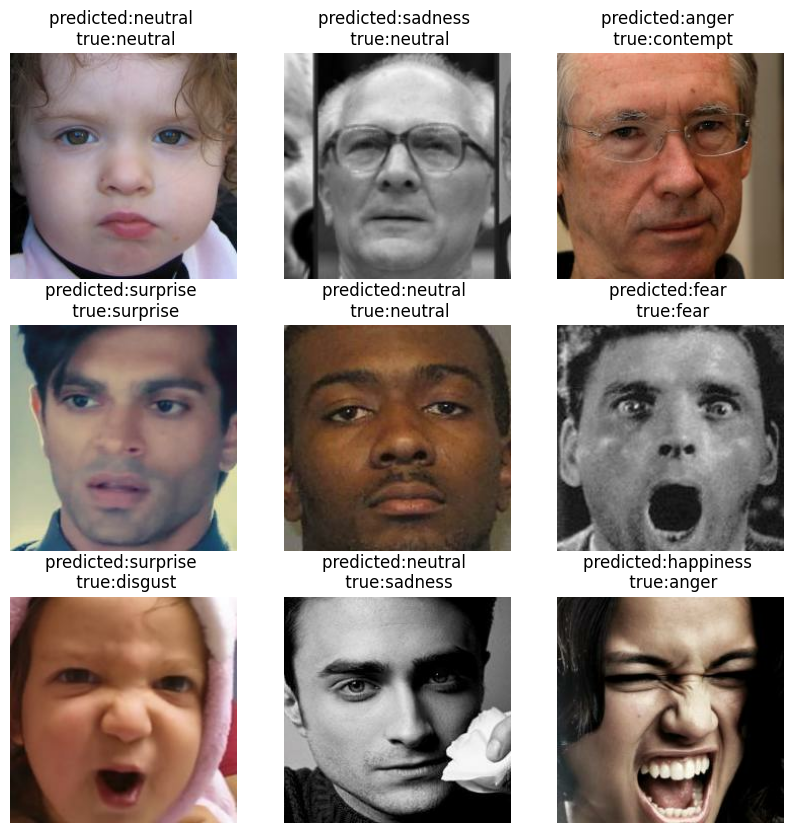

In [63]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].astype('uint8'))
    true_label=class_names[label_batch[i]]
    predicted_label=class_names[predictions[i]]
    plt.title(f'predicted:{predicted_label} \n true:{true_label}')
    plt.savefig('affectnet_prediction_downsampled.png')
    plt.axis('off')

## Predictions using Fine Tune Model

In [64]:
predictions=model_fine.predict_on_batch(image_batch)
predctions=tf.nn.softmax(predictions)
predictions=tf.argmax(predictions,axis=1)
predictions=predictions.numpy()

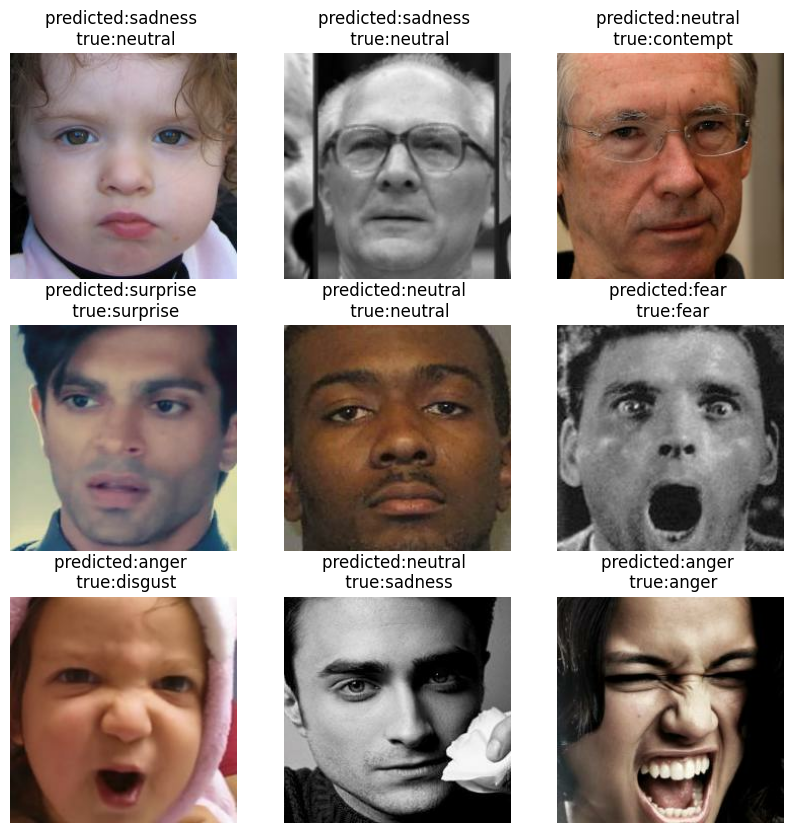

In [66]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].astype('uint8'))
    true_label=class_names[label_batch[i]]
    predicted_label=class_names[predictions[i]]
    plt.title(f'predicted:{predicted_label} \n true:{true_label}')
    plt.savefig('emoset_prediction_fine_1.png')
    plt.axis('off')

## train_acc v/s val_acc plot

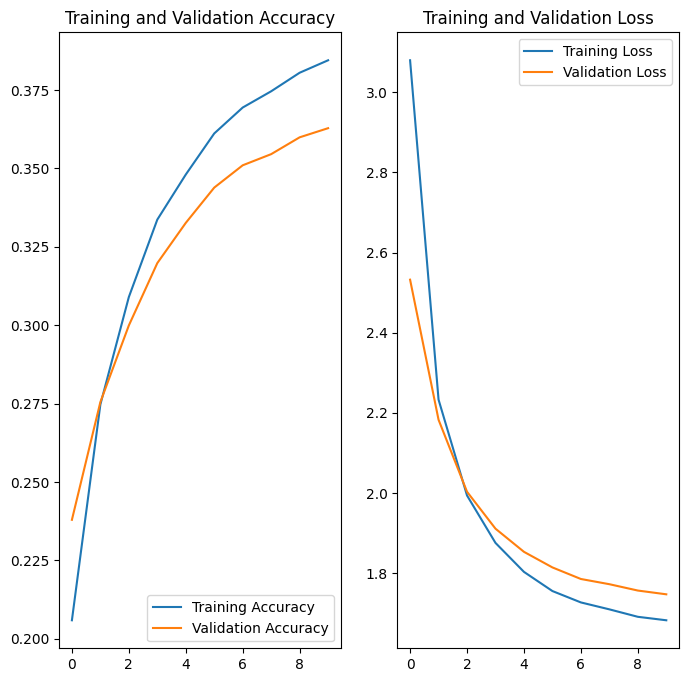

In [67]:
epochs=10
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('train_val_acc_plot.png')
plt.show()

In [ ]:
epochs=10
acc = history_fine['accuracy']
val_acc = history_fine['val_accuracy']

loss = history_fine['loss']
val_loss = history_fine['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
predictions=model_fine.predict_on_batch(image_batch)
predctions=tf.nn.softmax(predictions)


3 3 surprise surprise


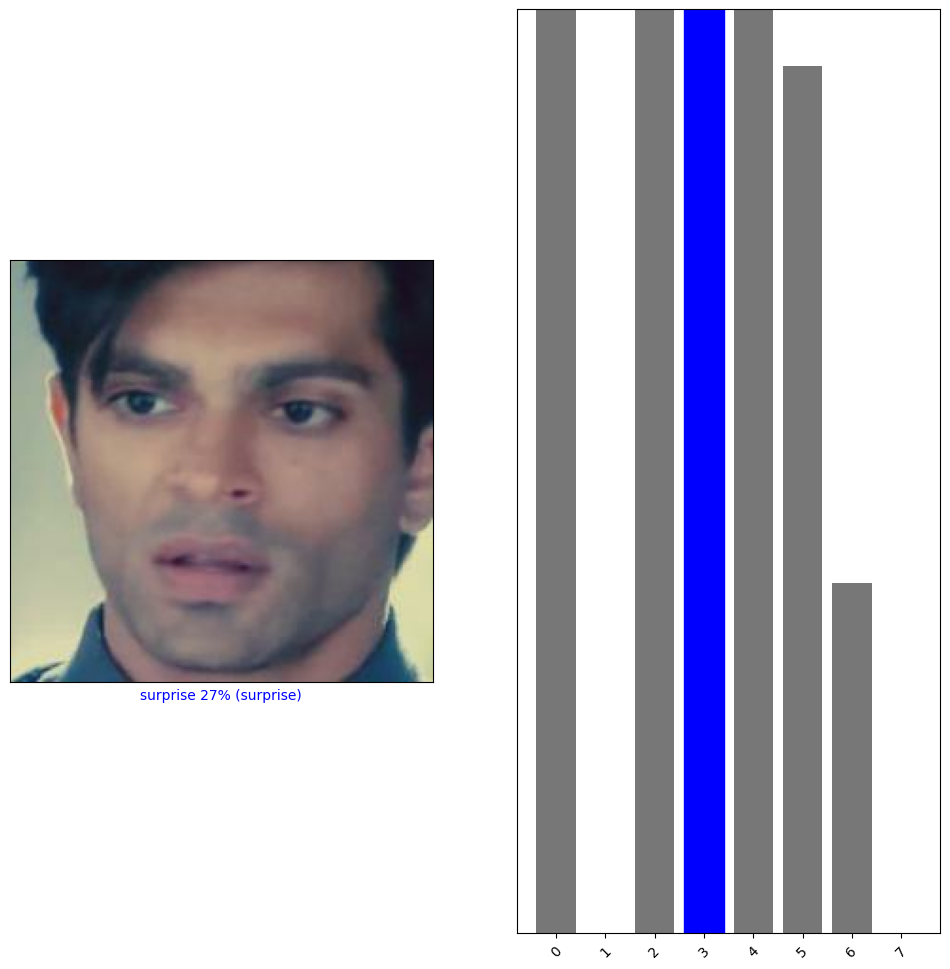

In [71]:
def plot_img(i,prediction_array,label_batch,img):
    true_label,img=label_batch[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('uint8'))

    prediction_label=np.argmax(prediction_array)

    if prediction_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[prediction_label],
                                10*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)


def plot_val(i,prediction_array,true_label):
    prediction_label=np.argmax(prediction_array)
    true_label=true_label[i]
    plt.xticks(range(8),class_names,rotation=45)
    plt.ylim([0,1])
    plt.yticks([])
    this_plot=plt.bar(range(8),prediction_array,color="#777777")

    print(prediction_label,true_label,class_names[prediction_label],class_names[true_label])
    this_plot[prediction_label].set_color('red')
    this_plot[true_label].set_color('blue')








i=3
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)

plot_img(i,predictions[i],label_batch,image_batch)
plt.subplot(1,2,2)
plot_val(i,predictions[i],label_batch)
plt.savefig('affectnet_fine_tune_plot.png')


2 0 sadness neutral
2 0 sadness neutral
0 7 neutral contempt
3 3 surprise surprise
0 0 neutral neutral
4 4 fear fear
6 5 anger disgust
0 2 neutral sadness
6 6 anger anger


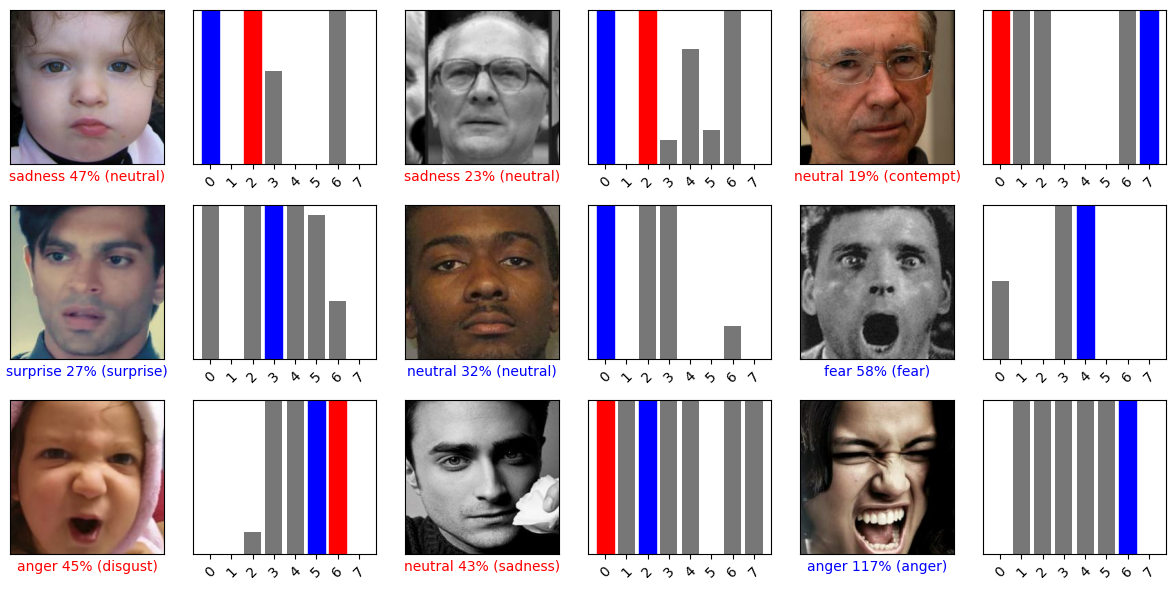

In [72]:
n_rows=3
n_cols=3
total_num=n_rows*n_cols
plt.figure(figsize=(2*2*n_rows,2*n_cols))
j=0
for i in range(0,9):
  
  plt.subplot(n_rows,2*n_cols,2*j+1)
  plot_img(i,predictions[i],label_batch,image_batch)
  plt.subplot(n_rows,2*n_cols,2*j+2)
  plot_val(i,predictions[i],label_batch)
  j=j+1
plt.tight_layout()

plt.show()

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

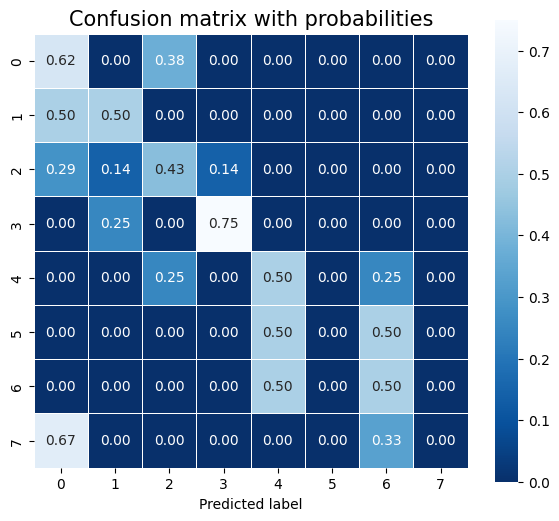

In [81]:
pred_on_test_ds = model_fine.predict_on_batch(image_batch)
predictions=tf.nn.softmax(pred_on_test_ds)
test_ds_predicted_classes = np.argmax(predictions, axis=1)
test_ds_max_prob = np.max(pred_on_test_ds, axis=1)
cm = confusion_matrix(label_batch, test_ds_predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.title('Confusion matrix with probabilities', size = 15)
plt.savefig('confusion_matrix.png')

plt.show()

In [82]:
from sklearn.metrics import f1_score

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(label_batch, test_ds_predicted_classes,average='macro')

# Calculate recall
recall = recall_score(label_batch, test_ds_predicted_classes,average='macro')

# Calculate F1 score
f1 = f1_score(label_batch, test_ds_predicted_classes,average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.34523809523809523
Recall: 0.4129464285714286
F1 Score: 0.3709325396825397


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
